In [3]:
# Importing required libraries
try:
    import os
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import sklearn
    import skimage

    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler, LabelEncoder
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.ensemble import RandomForestClassifier
    from skimage.io import imread
    from skimage.transform import resize
except ImportError:
    %pip install numpy pandas matplotlib seaborn scikit-learn scikit-image
    import os
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import sklearn
    import skimage
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler, LabelEncoder
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.ensemble import RandomForestClassifier
    from skimage.io import imread
    from skimage.transform import resize

In [7]:
# Paths
dataset_path = f"{os.getcwd()}/group9_ultrasound_data/Dataset_BUSI_with_GT"  # Replace with your folder path
categories = ["benign", "malignant", "normal"]

# Parameters
IMG_SIZE = (128, 128)  # Resize all images to 128x128 for uniformity

# Data Preparation
data = []
labels = []

for category in categories:
    folder_path = os.path.join(dataset_path, category)
    for file in os.listdir(folder_path):
        if "_mask" in file:  # Skip mask files for now
            continue
        img_path = os.path.join(folder_path, file)
        image = imread(img_path, as_gray=True)  # Load image in grayscale
        image_resized = resize(image, IMG_SIZE, anti_aliasing=True)  # Resize to IMG_SIZE
        data.append(image_resized.flatten())  # Flatten the image
        labels.append(category)

# Convert to NumPy arrays
X = np.array(data)
y = np.array(labels)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Convert labels to numerical values

In [8]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training (Random Forest as an example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

      benign       0.69      0.91      0.79        87
   malignant       0.74      0.55      0.63        42
      normal       0.82      0.33      0.47        27

    accuracy                           0.71       156
   macro avg       0.75      0.60      0.63       156
weighted avg       0.73      0.71      0.69       156



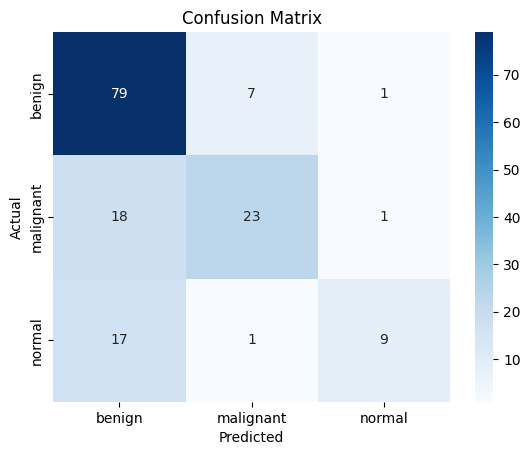

In [9]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()